Build a regression model.

In [64]:
#imports
import requests
import pandas as pd
import numpy as np
import json
import os
from dotenv import load_dotenv
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [65]:
pivot_fs = pd.read_csv('pivot_fs.csv')

In [66]:
# View correlation matrix.  Correlation looks weak between the fields, but there might be a polynomial relationship instead
pivot_fs[['fsq_rating','popularity','total_bikes']].corr()

,fsq_rating,popularity,total_bikes
fsq_rating,1.000000,0.245631,0.178467
popularity,0.245631,1.000000,-0.031780
total_bikes,0.178467,-0.031780,1.000000


In [67]:
# There are a lot of null values in fsq_rating, so I am only going to look at popularity for this model
print(pivot_fs[pivot_fs['fsq_rating'].isnull()]['POI_name'].count())

265


In [68]:
# Dropping rows where popularity is null
pivot_fs = pivot_fs[pivot_fs['popularity'].notnull()]

In [126]:
X = pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
y = [1,4,7,13,30,34,47,68,85,110]

In [127]:
degree = 2
poly_reg = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_reg.fit_transform(X)

In [128]:
model = LinearRegression()
model.fit(X_poly,y)

ValueError: Found input variables with inconsistent numbers of samples: [10, 11]

In [117]:
X = pivot_fs[['popularity']]
y = pivot_fs['total_bikes']

degree = 2
poly_reg = PolynomialFeatures(degree=degree,include_bias=False)
X_poly = poly_reg.fit_transform(X)

In [118]:
model = LinearRegression()
model.fit(X_poly,y)


LinearRegression()

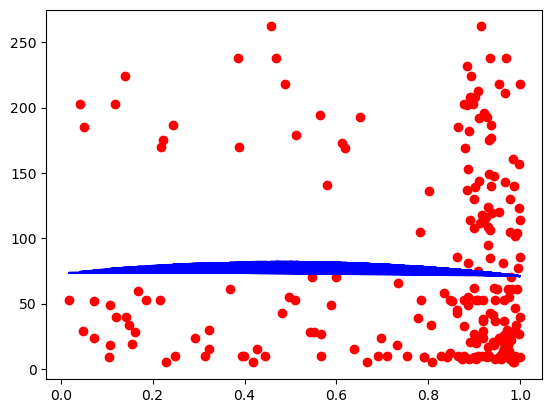

In [119]:
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X_poly),color='blue')

AttributeError: 'LinearRegression' object has no attribute 'intercept'

In [85]:
np.log(y)

0      3.970292
1      4.127134
5      4.110874
6      3.761200
10     4.912655
         ...   
296    5.257495
297    2.397895
298    4.007333
299    3.806662
300    2.302585
Name: total_bikes, Length: 223, dtype: float64

Provide model output and an interpretation of the results. 

# Stretch

How can you turn the regression model into a classification model?